In [1]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip
import datetime

'''Data Prep'''
from sklearn import preprocessing as pp 

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import gzip

In [2]:
import random
# import pandas as pd
# import numpy as np
# import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
import os
os.chdir('/Users/lhs/Desktop/Machine_Sound_Data')

In [4]:
CFG = {
    'SR':16000,
    'N_MFCC':128, # MFCC 벡터를 추출할 개수 (<=128)
    'SEED':41
}

In [5]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED']) # Seed 고정

In [6]:
train_df = pd.read_csv('./train.csv') # 모두 정상 Sample
test_df = pd.read_csv('./test.csv')

In [9]:
def get_mfcc_feature(df):
    features = []
    for path in tqdm(df['SAMPLE_PATH']):
        # librosa패키지를 사용하여 wav 파일 load
        y, sr = librosa.load(path, sr=CFG['SR'])
        
        # librosa패키지를 사용하여 mfcc 추출
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=CFG['N_MFCC'])

        y_feature = []
        # 추출된 MFCC들의 평균을 Feature로 사용
        for e in mfcc:
            y_feature.append(np.mean(e))
        features.append(y_feature)
    return features

In [10]:
train_features = get_mfcc_feature(train_df)
test_features = get_mfcc_feature(test_df)

  0%|          | 0/1279 [00:00<?, ?it/s]

  0%|          | 0/1514 [00:00<?, ?it/s]

In [20]:
len(test_features)

1514

In [24]:
y_train = train_df['LABEL']

In [28]:
# Define scatterplot function 
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

## SVD

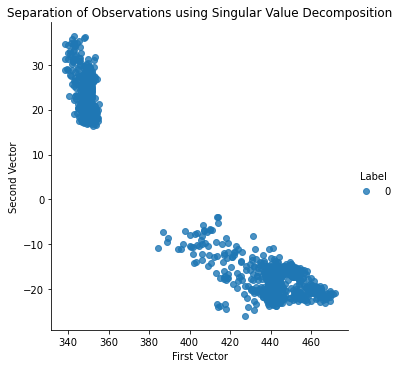

In [32]:
# Singular Value Decomposition
from sklearn.decomposition import TruncatedSVD

n_components = 128
algorithm = 'randomized'
n_iter = 5
random_state = 2022

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm,
                   n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(train_features)
X_train_svd = pd.DataFrame(data=X_train_svd) #, index=train_index)

X_validation_svd = svd.transform(train_features)
X_validation_svd = pd.DataFrame(data=X_validation_svd)#, index=validation_index)

scatterPlot(X_train_svd, y_train, "Singular Value Decomposition")

## Random Projection

#### Gaussian Random Projection

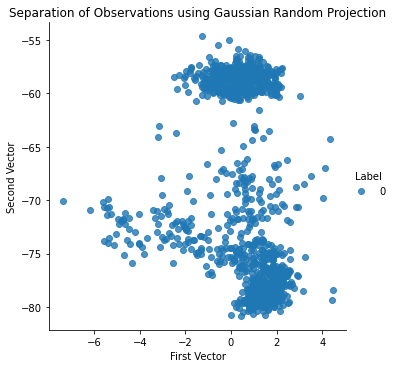

In [42]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 128
eps = 0.5
random_state = 2022

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, \
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(train_features)
X_train_GRP = pd.DataFrame(data=X_train_GRP) # , index=train_index)

# X_validation_GRP = GRP.transform(X_validation)
# X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

#### Sparse Random Projection

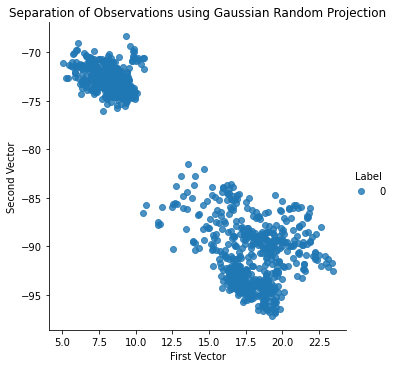

In [48]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 128
eps = 0.5
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, \
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(train_features)
X_train_GRP = pd.DataFrame(data=X_train_GRP)# , index=train_index)

# X_validation_GRP = GRP.transform(X_validation)
# X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")